<a href="https://colab.research.google.com/github/PaoloBarba/ADM_HW2-Group18/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Bellaroba Albachiara, Soukaina Alaoui, Gasbarri Francesca.

#Import the packages and upload datasets


In [72]:
import pandas as pd
import random
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm     
import statsmodels.api as sm
from datetime import datetime
from time import strptime
from datetime import datetime, date
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud




In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
locations =pd.read_csv('/content/drive/MyDrive/ADM_HW2/instagram_locations.csv',sep='\t')
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')
#posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',nrows=10000)

# RQ1 
## Exploratory Data Analysis

To perform an explanatory data analysis, we will go through three different steps: data explorations, data manipulations, and data summary.
First, we will show the first few rows of the datasets we are analyzing.

In [ ]:
locations.head()

In [ ]:
profiles.head()

In [ ]:
posts.head()

We can now look at the columns of our datasets to understand which variables we are analyzing.
First of all, we will do info method into the dataset to quickly understand the variables we are working with, get the number of rows and
columns we have for each dataset.

In [ ]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [ ]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [ ]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sid              100000 non-null  int64 
 1   sid_profile      100000 non-null  int64 
 2   post_id          100000 non-null  object
 3   profile_id       100000 non-null  int64 
 4   location_id      100000 non-null  int64 
 5   cts              100000 non-null  object
 6   post_type        100000 non-null  int64 
 7   description      91905 non-null   object
 8   numbr_likes      100000 non-null  int64 
 9   number_comments  100000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 7.6+ MB


In [ ]:
print("Locations dataframe has " + str(locations.shape[0]) + " observations and "  + str(locations.shape[1]) + " variables")
print("Profiles dataframe has " + str(profiles.shape[0]) + " observations and "  + str(profiles.shape[1]) + " variables")
print("Posts dataframe has " + str(posts.shape[0]) + " observations and "  + str(posts.shape[1]) + " variables")

We are going one step further, having a better understanding of the statistical properties of these data frames by using a described method that gives us basic statistics of all the numerical columns we have. We are doing a statistical summarization at all the numeric variables that have the sense to summarize.

In [ ]:
profiles[["following" , "followers" , "n_posts" ]].describe()

In [ ]:
posts[["numbr_likes","number_comments"]].describe()

To do a better analysis, we clean up our datasets as much as possible by following the steps described below.


1.   **Dealing with duplicates rows**:
      we drop every duplicates rows because contains useless informations 
2.    **Dealing with missing values**:
      we check the percentage of missing values in each column, we drop a column that contains missing values over a set threshold. After we select some columns of interest and drop the NA
3. **Dealing with outliers:** It is risky to include outliers in data-driven models. For some variables of interest, we have incorrect typing data or false profiles that influence the distribution so much, we want to detect them and decide whether to delete them or not.





In [ ]:
#Duplicates rows
profiles.drop_duplicates(inplace=True)
posts.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)

In [ ]:
#Dealing with missing values, columns that contains so much Na
#check for null values / % of null values we have
print('Null values percentage for locations dataset')
print(locations.isnull().sum()/locations.shape[0])
print('\n')
print('Null values percentage for profiles dataset')
print(profiles.isnull().sum()/profiles.shape[0])
print('\n')
print('Null values percentage for posts dataset')
print(posts.isnull().sum()/posts.shape[0])

Null values percentage for locations dataset
sid                       0.000000
id                        0.000000
name                      0.000000
street                    0.300153
zip                       0.300275
city                      0.083598
region                    0.998279
cd                        0.081795
phone                     0.411643
aj_exact_city_match       0.021657
aj_exact_country_match    0.021657
blurb                     0.602306
dir_city_id               0.515285
dir_city_name             0.515285
dir_city_slug             0.515751
dir_country_id            0.515353
dir_country_name          0.515285
lat                       0.006026
lng                       0.006026
primary_alias_on_fb       0.583897
slug                      0.079196
website                   0.390547
cts                       0.000000
dtype: float64


Null values percentage for profiles dataset
sid                    0.000000
profile_id             0.007195
profile_name           0.

In [ ]:
#remove null colums over the threshold
profiles.dropna(thresh = len(profiles)*.6, axis=1)
locations.dropna(thresh = len(locations)*.6, axis=1)

We have to manage Na and outliers values to do a better analysis.
For Na values, we have more than one option to do.

**Replace with the mean:** if there are a lot of missing values we are concentrating the distribution in the mean value and we lose information about the true shape of the distributions.

**Drop Na:** We are losing a relevant percentage of the information we have, however having a huge quantity of data, doesn't influence so much the distribution we are analyzing. So in this case we will go through this procedure .

In [ ]:
#We show only some example of variable we are cleaning
posts.dropna(subset=['numbr_likes', 'number_comments'])

The existence of misleading values has the potential to change the conclusion implied by the model. It is, therefore, important to detect and then decide whether to remove it or not from the dataset. Sometimes the data point may be extremely high or low but that does not mean it is an outlier that we want to get rid of. In the case of Instagram, for instance, a huge amount of followers' value is no sign of errors but can correspond to influencer accounts. On the opposite, an account with zero posts or zero followers usually corresponds to a fake or new account that we don't want to consider in our analysis (we will clean them up when we will analyze them in the next questions) .



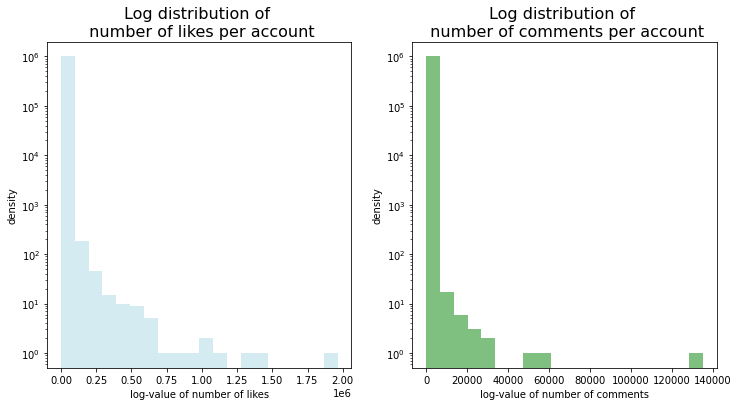

In [ ]:
num_bins = 20
plt.figure(figsize=(12,6))

# Logaritmic histogram of the data and box plot
plt.subplot(121)
plt.hist(posts['numbr_likes'] ,  num_bins, facecolor='lightblue', alpha=0.5,log=True)
plt.xlabel("log-value of number of likes")
plt.ylabel("density")
plt.title("Log distribution of \n number of likes per account", size = 16)

plt.subplot(122)
plt.hist(posts['number_comments'] ,  num_bins, facecolor='green', alpha=0.5,log=True)
plt.xlabel("log-value of number of comments")
plt.ylabel("density")
plt.title("Log distribution of \n number of comments per account", size = 16)

plt.show()

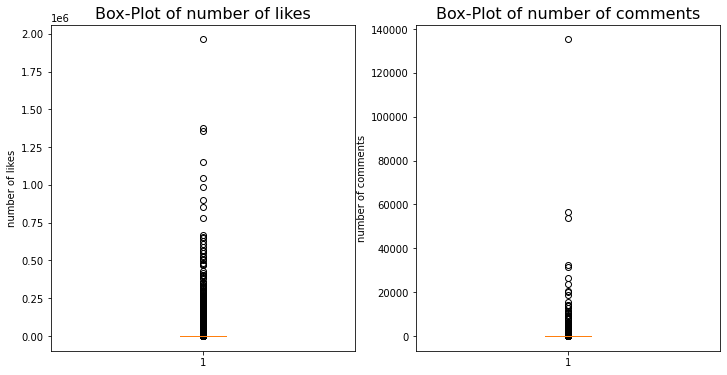

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(posts['numbr_likes'] )
plt.xlabel("")
plt.ylabel("number of likes")
plt.title("Box-Plot of number of likes", size = 16)

plt.subplot(122)
plt.boxplot(posts['number_comments'])
plt.xlabel("")
plt.ylabel("number of comments")
plt.title("Box-Plot of number of comments", size = 16)

plt.show()

We used a logarithmic scale because the data covers a wide range of values and there is an evident skewness toward small values.

Since most of the observations are concentrating to low value, we can show the actual distribution untill the 90% percentile.

In [ ]:
likes_outliers= posts.numbr_likes[posts.numbr_likes < posts.numbr_likes.quantile(.9)]
comments_outliers= posts.number_comments[posts.number_comments< posts.number_comments.quantile(.9)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of \n number of comments per post')]

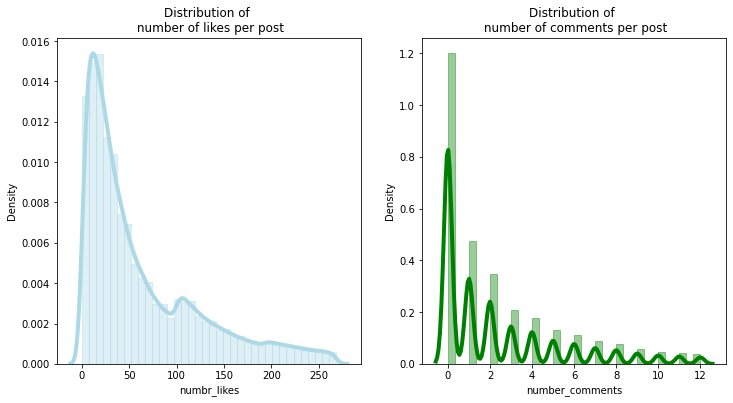

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(likes_outliers, hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 4}).set(title='Distribution of \n number of likes per post')
plt.subplot(122)
sns.distplot(comments_outliers, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4}).set(title='Distribution of \n number of comments per post')
plt.show()

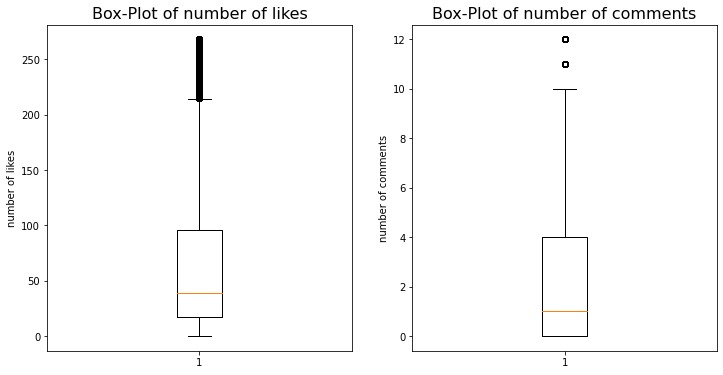

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(likes_outliers )
plt.xlabel("")
plt.ylabel("number of likes")
plt.title("Box-Plot of number of likes", size = 16)

plt.subplot(122)
plt.boxplot(comments_outliers)
plt.xlabel("")
plt.ylabel("number of comments")
plt.title("Box-Plot of number of comments", size = 16)

plt.show()

In [ ]:
#What is the most common time in which users publish their posts?
file =("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv" )
posts = pd.read_csv(file, usecols= ['cts'], sep='\t')
def publishing_time(data, count):
    #convert cts column to datetime
    pub_time = pd.to_datetime(data.cts).dt.floor('Min').dt.time
    #group by publishing time
    grouping = pub_time.groupby(pub_time).size().sort_values(ascending=False).head(count)
    timing = grouping.index.to_list()
    for i in timing:
        print('{:02d}:{:02d}:{:02d}'.format(i.hour, i.minute, i.second))
#publishing_time(posts, 1)
print('The most common time in which users publish their posts is at:', end=' ')
publishing_time(posts, 1)

The most common time in which users publish their posts is at: 18:00:00


In [ ]:
#Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

def time_interval(data, intervals):
    datex = pd.DataFrame(pd.to_datetime(data.cts))
    datex.set_index(pd.DatetimeIndex(datex.cts), inplace=True)
    calc = 0
    value_counts = pd.DataFrame()
    #loop over interval list
    for interval in intervals:
        start, end = interval
        tot = datex.between_time(start, end).count()
        tot = int(tot[0])
        RES = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot})
        value_counts = value_counts.append(RES)
        calc += tot
    value_counts.reset_index(drop = True, inplace = True)
    print(value_counts)
    sns.set()

    ax = value_counts.plot(figsize=(14,8), kind='bar', color = 'rgbkymc', zorder=3)
    plt.setp(ax, xlabel='The time intervals', ylabel='Number of posts', title = 'Posts for each time interval')
    plt.show()

# RQ4

In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"


def from_profile_to_post(profile):
  
  df1 = pd.DataFrame(columns= posts.columns)
  df = pd.read_csv(filename, sep='\t', chunksize=500000)

  
  for chunk in tqdm(df):
    df1 = pd.concat([ df1 , chunk[chunk ['sid_profile'] == profile ] ]) 

  return df1



In [ ]:
from_profile_to_post(199664772)

3it [00:10,  3.58s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"
df1 = pd.DataFrame(columns= posts.columns)

df = pd.read_csv(filename, sep='\t', nrows=1000)
pd.concat([ df1 , df[df ['sid_profile'] == 3496776 ] ]) 




In [ ]:
def posts_top_n(n):
  n_prof = profiles.sort_values(by=['n_posts'], ascending=False).head(n)
  top_df =  pd.DataFrame(columns= posts.columns)
  for p in n_prof['profile_id']:
    top_df= pd.concat([top_df ,from_profile_to_post(int(p))])
  return top_df




In [ ]:
posts_top_n(2)

86it [05:39,  3.95s/it]
86it [05:33,  3.88s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


In [ ]:
profiles.sort_values(by=['n_posts'], ascending=False).head(5)

In [ ]:
#What is the average time (days and minutes) a user lets pass before publishing another post? 
#Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

file =("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv" )
posts = pd.read_csv(file, usecols= ['profile_id','cts'], sep='\t')

time = pd.DataFrame(posts[['profile_id','cts']])


time['cts']=pd.to_datetime(posts['cts'])

time.head(10)


,profile_id,cts
0,2.237948e+09,2017-08-06 20:06:57
1,5.579335e+09,2017-06-19 09:31:16
2,3.134296e+08,2017-03-11 20:05:03
3,1.837593e+09,2016-09-13 16:27:16
4,1.131527e+09,2015-10-18 10:19:27
5,1.626239e+07,2018-12-14 18:16:15
6,3.567387e+07,2018-08-09 17:53:46
7,8.408734e+08,2018-08-23 22:00:59
8,3.299940e+05,2015-05-14 11:02:05
9,3.607965e+08,2017-01-30 17:52:01


In [ ]:
#Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

file =("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv" )
posts = pd.read_csv(file, usecols= ['cts','numbr_likes','number_comments'], sep='\t')


def time_interval2(data, intervals):
    datex = pd.DataFrame(pd.to_datetime(data.cts))
    datex.set_index(pd.DatetimeIndex(datex.cts), inplace=True)
    calc = 0
    value_counts = pd.DataFrame()
    #loop over interval list
    for interval in intervals:
        start, end = interval
        tot = datex.between_time(start, end).count()
        tot = int(tot[0])
        RES = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot})
        value_counts = value_counts.append(RES)
        calc += tot
    value_counts.reset_index(drop = True, inplace = True)
    print(value_counts)
    sns.set()

    ax = value_counts.plot(figsize=(14,8), kind='bar', color = 'rgbkymc', zorder=3)
    plt.setp(ax, xlabel='The time intervals', ylabel='Number of likes', title = 'Likes for each time interval')
    plt.show()


# RQ7

What's the probability that a post receives more than 20% "likes" of the number of followers a user has?
---


To compute the probability. Let's define the event

A: { " a post has  number of likes greater than 20% of the number of followers of the account linked with  "}.

We divide the number of ways the event can occur by the total number of possible outcomes.

Define then the indicator function as below:

\begin{equation}
\mathbb{I}(\omega_{i}) =
\begin{cases}
  1 \hspace{0.3cm}  \omega \in A  \\
  0 \hspace{0.3cm}  otherwise
\end{cases}
\end{equation}

Then the target probability will be :

\begin{equation}
\hat{p} = \frac{1}{n} ∑_{i = 1}^{lenpost} \mathbb{I}(\omega_{i}) 
\end{equation}

Note: 

In the code, we add 1 to the formula, both in the nominator and denominator, to manage the posts that belong to profiles with zero followers.

In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"

df = pd.read_csv(filename, usecols= ['numbr_likes' , 'sid_profile'], sep='\t', iterator=True, chunksize=500000)
shape = 0
l=[]
for chunk in tqdm(df):
  m=pd.merge(chunk , profiles, left_on="sid_profile", right_on="sid").drop('sid', axis=1)
  l.append(sum(m.apply(lambda x :  (x.numbr_likes + 1) / (x.followers + 1), axis = 1 ) > .2))
  shape += m.shape[0]




86it [16:11, 11.30s/it]


In [ ]:
print("The estimate probability is: " , sum(l)/shape)

0.15670264527000136

Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.
---

When computing this probability, we used the same approach as before. In this case, the event is defined as :

B = {" a user has at least 2 posts at the same location "}.

Note:

We interpreted the question with this restriction : 

If a user posted more than 2 posts in the same location we count it by 1 . ( He actually returns at the same place and we don't care if he returns more than twice).

if a user posted 2 or more posts in two more different locations we count it by 1. ( In our opinion might have sense to count it by 1 or by the number of locations
visited at least twice, we chose the first one)

In our opinion, this probability does not make much sense since a user could post a picture in the same location months after they visited that place, without go there.

Moreover, a user could go to the same place but insert a different location_id, that is they could once use a more accurate location tag and another time a more vague one (e.g. Colosseum and Rome).

In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"
df = pd.read_csv(filename, usecols= ['location_id' , 'sid_profile'], sep='\t')


m = pd.merge( df , profiles , left_on="sid_profile", right_on="sid").drop('sid', axis=1)
l=(sum(m.groupby('sid_profile', group_keys=True).apply(lambda x:len(x.location_id) != len(set(x.location_id)) )))





In [ ]:
print("The target probability is : " , np.mean(l))

27437048

# R8

Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.
----

In order to discover rather more likes mean more comments, we show the scatter plot of the number of like vs the number of comments.

In [ ]:
# do not change the number of rows. We have done the analysis with them. More rows are not needed and can complicated so much the analysis
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',usecols=['number_comments', 'numbr_likes' , 'cts' ], nrows= 5000000) 

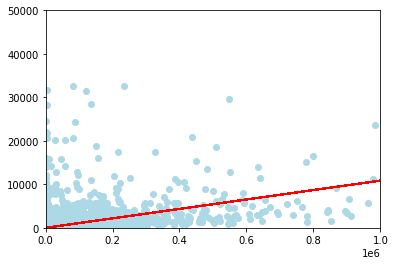

In [ ]:
plt.plot(posts['numbr_likes'], posts['number_comments'], 'o', color='lightblue');

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(posts['numbr_likes'], posts['number_comments'], 1)

#use red as color for regression line
plt.plot(posts['numbr_likes'], m * posts['numbr_likes'] +b, color='red');
plt.title("Number likes vs. Number comments")
plt.xlim([0,1000000]);
plt.ylim([0,50000]);


We can already see graphically that there is no obvious relationship between the number of comments and the number of likes a post has.

To analyze it analytically, we can perform a linear regression. The result of this analysis is shown below.

In [ ]:
posts.dropna()

In [ ]:
x = posts.numbr_likes
y = posts.number_comments

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:        number_comments   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                 1.158e+06
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:19:55   Log-Likelihood:            -3.1017e+07
No. Observations:             5000000   AIC:                         6.203e+07
Df Residuals:                 4999998   BIC:                         6.203e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9593      0.054     73.904      

Briefly comments on the output:

The data provides a significant non-relationship between the number of likes and the number of comments.

The Beta coefficient explains that for a unit increase in the number of likes, an increase of 0.0108 (almost 0) in the number of comments is expected.

The R-squared of 0.188 means that the variance of the number of comments is explained by 19% by the variance of the number of likes.

8.2) Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.
----

To find out if there is a significant relationship between the time a user posts a post and the number of comments and "likes" he received, we perform an ANOVA analysis for both the number of comments and the likes.

ANOVA ( **AN** alysis **O**f **VA**riance ) is a statistical procedure to analyze differences among means from each groups.

Doing ANOVA we are testing if the $H_{0}$ hypothesis: "all the mean for each group are the same" is true or not.


$ H_{0}: \mu_{1} = \mu_{2} = ... =  \mu_{s}  $


We created groups by clustering cts variables per hour.

We built bar plots of the means for each group.

We built a boxplot of the variables for each group

We compute the F - statistics, derive the p-value and decide whether accept or not the null hypothesis.

ANOVA makes the following assumptions about the probability distribution of the responses..




*   Independence of observations 
*   the distributions of the residuals are normal.
*   homoscedasticity—the variance of data in groups should be the same.


Remark are shown below.



In [ ]:
posts['cts'] = pd.to_datetime(posts.cts).dt.floor('H').dt.time

In [ ]:
grouping = posts.groupby(posts.cts).apply( lambda x : np.mean(x.number_comments))
timing = grouping.index.to_list()
dic={}

for x, t in zip(grouping, timing):
  dic['{:02d}:{:02d}:{:02d}'.format(t.hour, t.minute, t.second)] = x

data ={'cts' : dic.keys(), 'mean_number_comments': dic.values() }

df = pd.DataFrame(data)



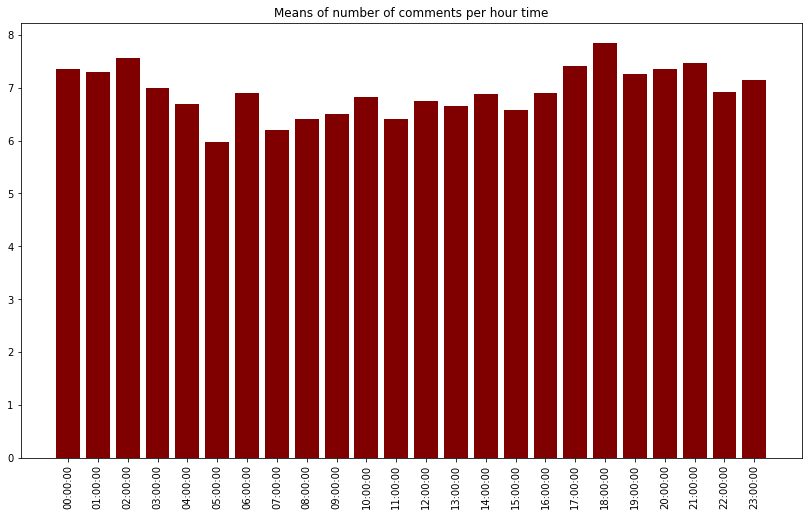

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(df.cts,df.mean_number_comments, color ='maroon',
        width = 0.8);
plt.title("Means of number of comments per hour time")        
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


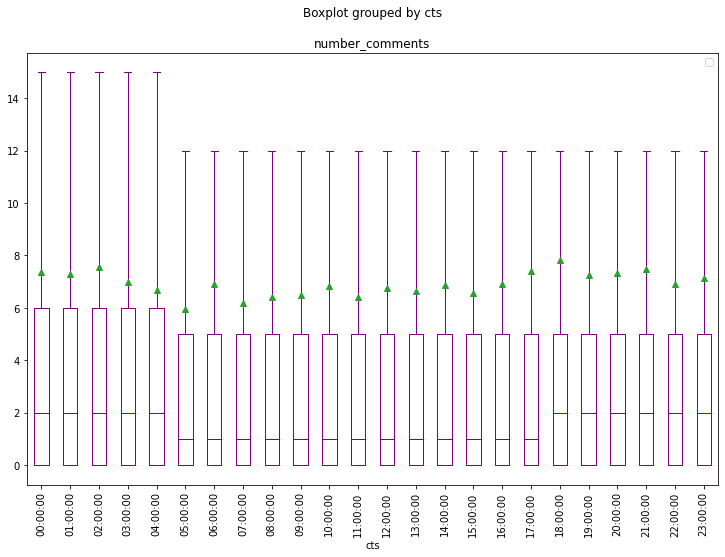

In [ ]:
grouping = posts.groupby(posts.cts).apply( lambda x : x.number_comments )

g = pd.DataFrame(grouping)
g.boxplot('number_comments', by='cts', figsize=(12, 8), showfliers= False , grid = False , color = 'purple' , showmeans=True);

plt.xticks(rotation=90);


In [ ]:
ctrl = posts['number_comments'][posts.cts == 'cts']
grps = pd.unique(posts.cts.values)
d_data = {grp: posts['number_comments'][posts.cts == grp] for grp in grps}

In [ ]:
l=list(d_data.keys())

F, p = stats.f_oneway(
    d_data[l[0]], d_data[l[1]]  , d_data[l[2]], d_data[l[3]], d_data[l[4]], d_data[l[5]],
    d_data[l[6]], d_data[l[7]]  , d_data[l[8]],d_data[l[9]], d_data[l[10]], d_data[l[12]],
    d_data[l[13]], d_data[l[14]], d_data[l[15]],d_data[l[16]], d_data[l[17]], d_data[l[18]],
    d_data[l[19]], d_data[l[20]], d_data[l[21]],d_data[l[22]], d_data[l[23]])
print(F , p ,"\n", "We reject the null hypothesis \n Data provides significant difference among the means of the time slots")

2.408751970123262 0.0002276753156973062 
 We reject the null hypothesis 
 Data provides significant difference among the means of the time slots


The value of the F- statistics is the ratio: between deviance / within deviance.

The "between deviance" is the deviance due to the systematic factor "hour". If the ratio is greater than 1 means that the between deviance is greater than the within deviance and there is a significant change in the means for each group.

Anyway, we have already seen that the means are not good statistics for a very skew distribution.The distribution we are analyzing does not respect the assumption of normality requested by ANOVA.
In this case, the median is a more rappresented summarization.

The principle of the test we will use is that if two samples have the same median, they should have more or less the same proportion of observations on a interval above and below that median. This would be true irrespective of their two distributions and so no normality assumptions are needed. 

In order to have a better explanation of analysis we should try with any combination of hour times. In order not to make the analysis heavy, we will proceed with only a few examples

We can think of dividing the time into slots: [daytime hours: from 5 to 17 and night hours: from 18 to 4] and see if there is a significant difference on median compared to the time slots.






In [ ]:
# ANOVA for medians for day hour
F1 ,p1 = stats.mannwhitneyu( d_data[l[1]], d_data[l[2]] )
# ANOVA for medians for night hour
F2 ,p2 =  stats.mannwhitneyu( d_data[l[11]], d_data[l[12]] )
# ANOVA for medians for night hour
F3 ,p3 =  stats.mannwhitneyu( d_data[l[20]], d_data[l[14]] )

print(F1 ,p1, "\n", 
      "Daytime comparision:" , "\n"
      "We accept the null hypothesis ", "\n"
      "Data don't provide significante median changes  between  daily time slots ")
print("\n")
print(F2 ,p3, "\n", 
      "Nighttime comparision:" , "\n"
      "We accept the null hypothesis ", "\n"
      "Data don't provide significante median changes between night time slots ")
print("\n")
print(F3 ,p3, "\n", 
      "Daytime and Nightime comparision:" , "\n"
      "We reject the null hypothesis ", "\n"
      "Data provide significante median changes  between daily and night time slots ")

19663062294.5 6.915263616142664e-16 
 Daytime comparision: 
We accept the null hypothesis  
Data don't provide significante median changes  between  daily time slots 


25948432515.0 2.115915340200362e-37 
 Nighttime comparision: 
We accept the null hypothesis  
Data don't provide significante median changes between night time slots 


19663062294.5 6.915263616142664e-16 
 Daytime and Nightime comparision: 
We reject the null hypothesis  
Data provide significante median changes  between daily and night time slots 


Note: we only compare some slots time and then we can't declare that according to median there is a relationship between number of comments and dayhours and nighthours.

Reapiting the same procedure on the variable: number_likes

In [ ]:
grouping = posts.groupby(posts.cts).apply( lambda x : np.mean(x.numbr_likes))
timing = grouping.index.to_list()
dic={}
for x, t in zip(grouping, timing):
  dic['{:02d}:{:02d}:{:02d}'.format(t.hour, t.minute, t.second)] = x
dic.keys()
data ={'cts' : dic.keys(), 'mean_number_likes': dic.values() }

df = pd.DataFrame(data)

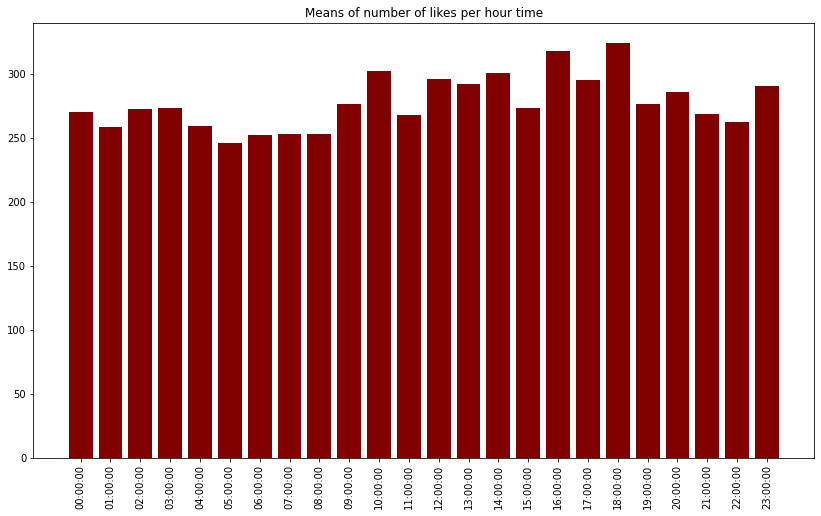

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(df.cts,df.mean_number_likes, color ='maroon',
        width = 0.8);
plt.title("Means of number of likes per hour time")        
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text major ticklabel objects>)

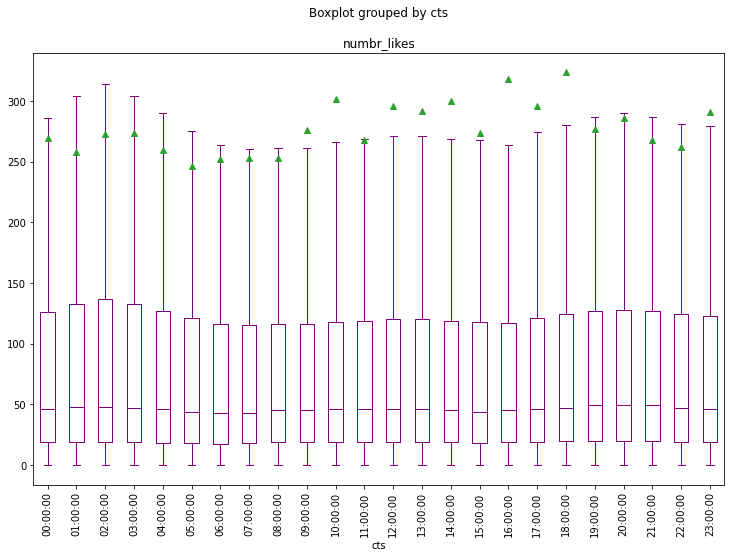

In [ ]:
grouping = posts.groupby(posts.cts).apply( lambda x : x.numbr_likes )
g = pd.DataFrame(grouping)
g.boxplot('numbr_likes', by='cts', figsize=(12, 8), showfliers= False , grid = False ,color = 'purple', showmeans= True);
plt.xticks(rotation=90)

In [ ]:
ctrl = posts['numbr_likes'][posts.cts == 'cts']
grps = pd.unique(posts.cts.values)
d_data = {grp: posts['numbr_likes'][posts.cts == grp] for grp in grps}

In [ ]:
l=list(d_data.keys())

F, p = stats.f_oneway(
    d_data[l[0]], d_data[l[1]]  , d_data[l[2]], d_data[l[3]], d_data[l[4]], d_data[l[5]],
    d_data[l[6]], d_data[l[7]]  , d_data[l[8]],d_data[l[9]], d_data[l[10]], d_data[l[12]],
    d_data[l[13]], d_data[l[14]], d_data[l[15]],d_data[l[16]], d_data[l[17]], d_data[l[18]],
    d_data[l[19]], d_data[l[20]], d_data[l[21]],d_data[l[22]], d_data[l[23]])
print(F , p ,"\n", "We reject the null hypothesis \n Data provides significant difference among the means of the time slots")

3.362977726002919 1.5387976263440646e-07 
 We reject the null hypothesis 
 Data provides significant difference among the means of the time slots


In [ ]:
# ANOVA for medians for day hour
F1 ,p1 = stats.mannwhitneyu( d_data[l[1]], d_data[l[2]] )
# ANOVA for medians for night hour
F2 ,p2 =  stats.mannwhitneyu( d_data[l[11]], d_data[l[12]] )
# ANOVA for medians for night hour
F3 ,p3 =  stats.mannwhitneyu( d_data[l[20]], d_data[l[14]] )

print(F1 ,p1, "\n", 
      "Daytime comparision:" , "\n"
      "We accept the null hypothesis ", "\n"
      "Data don't provide significante median changes  between  daily time slots ")
print("\n")
print(F2 ,p3, "\n", 
      "Nighttime comparision:" , "\n"
      "We reject the null hypothesis ", "\n"
      "Data provide significante median changes between night time slots ")
print("\n")
print(F3,p3, "\n", 
      "Daytime and Nightime comparision:" , "\n"
      "We reject the null hypothesis ", "\n"
      "Data provide significante median changes  between daily and night time slots ")


19954570492.5 0.9867073714009481 
 Daytime comparision: 
We accept the null hypothesis  
Data don't provide significante median changes  between  daily time slots 


25102514231.0 3.196322547293318e-113 
 Nighttime comparision: 
We accept the null hypothesis  
Data don't provide significante median changes between night time slots 


19201011378.5 3.196322547293318e-113 
 Daytime and Nightime comparision: 
We reject the null hypothesis  
Data provide significante median changes  between daily and night time slots 


8.3) What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.
----

In [ ]:
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')

In [ ]:
followers_outliers= profiles.followers[profiles.followers < profiles.followers.quantile(.95)]
followers_outliers= followers_outliers[profiles.followers > profiles.followers.quantile(.05)]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of followers per profile')]

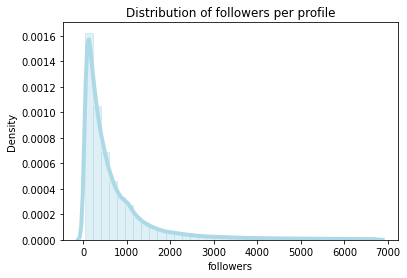

In [ ]:
sns.distplot(followers_outliers, hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 4}).set(title='Distribution of followers per profile')


In [ ]:
print("The actual mean of followers distribution is " , profiles.followers.mean())
print("The actual mode of followers distribution is ", profiles.followers.mode())
print("The actual median of followers distribution is ",profiles.followers.median())
print("The actual 1st quartile of followers distribution is ",profiles.followers.quantile(.25))
print("The actual 3rd quartile of followers distribution is ",profiles.followers.quantile(.75))

The actual mean of followers distribution is  4739.899180397426
The actual mode of followers distribution is  0    0.0
dtype: float64
The actual median of followers distribution is  406.0
The actual 1st quartile of followers distribution is  159.0
The actual 3rd quartile of followers distribution is  974.0


In [ ]:
print("The  mean of truncate followers distribution is " , followers_outliers.mean())
print("The  mode of truncate followers distribution is ", followers_outliers.mode())
print("The  median of truncate followers distribution is ",followers_outliers.median())
print("The 1st quartile of truncate followers distribution is ",followers_outliers.quantile(.25))
print("The  3rd quartile of truncate followers distribution is ",followers_outliers.quantile(.75))

The  mean of truncate followers distribution is  740.7206838108066
The  mode of truncate followers distribution is  0    50.0
dtype: float64
The  median of truncate followers distribution is  407.0
The 1st quartile of truncate followers distribution is  179.0
The  3rd quartile of truncate followers distribution is  886.0


The mean is not a robust indicator, it is heavily influenced by outliers, so in the non-truncated distribution it does not represent a good representation of the distribution.

Fashion is the character that occurs most often in distribution, in true distribution it is 0, which is not very representative, as it represents unused or false profiles.

The median, being a robust index, is a good statistic to represent the distribution. It is not influenced by the outliers, so it is almost similar between the true distribution and the truncated distribution.

First and third quartiles are similar both in the truncated and untreated distribution, this is because like the median, they are position indices and therefore are not influenced by outliers.

8.4) What are histograms, bar plots, scatterplots and pie charts used for?
----
*   **Histograms:** is a graphical rappresentation to demonstrate how many of a certain type of variable occur within a specific range. It is used for give an approximation of the distribution of data points we are dealing with.
*   **Scatterplots:** is a graphical rappresentation of data points on a two-dimensional plane. It is used for show the relationship between the two variables of interest.
*   **Pie charts:** is a graphical rappresentation divided into slices (groups) to illustrate numerical proportion of the data points within the slices.

8.5) What insights can you extract from a Box Plot?
----
The information that a boxplot provides are:

The minimun of the distribution

The maximum of the distribution

The first quartile ( quantile of level .25)

The Median ( second quartile or quantile of level .5)
The third quartile ( quantile of level .75)
Sometimes is worth to show also the mean of the distribution, in order to compare it with the median.

With the boxplot rappresentation we see how much the distribution is skew.

# Bonus point


Bonus question a) Compare the mean of time intervals between posts for the two categories. Do you notice something relevant?
----

In order to do this task we split the profile dataset in two:

Group 1 = " the 10% of users with more number of followers"

Group 2 = " the rest users"

For each profile we should compute all the differences between posts intervall and compute the mean. To handle this complex problem we use this property: The mean of all the differences of a list is: 
\begin{equation}\frac{maximum - minimum}{ lenght(list) -  1}
\end{equation}.

To explain this property better we show an example:

L=[ 10 , 9 , 4, 1 ]

Doing the mean of the differences we are computing:


\begin{equation}
\frac{(10 - 9 ) + (9 - 4) + (4 - 1)}{3}  = \frac{10 -1}{3}  =  \frac{maximum - minimum}{lenght(list) -  1} 
\end{equation}


After computing the mean of time intervals between posts for each profile, we compute the mean of all the means for the two groups.

Remark are shown below.

In [ ]:
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t' , usecols=["followers", "sid"])
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',usecols=['sid_profile' , 'cts' ])

In [ ]:
group_1= profiles[profiles.followers > profiles.followers.quantile(.9)]
group_2= profiles[profiles.followers <= profiles.followers.quantile(.9)]

In [ ]:
posts['cts'] = pd.to_datetime(posts.cts)

In [ ]:
g = posts.cts.groupby(posts.sid_profile).apply(list).reset_index()          
g['mean_time'] = g.cts.apply(lambda x: ((max(x)-min(x)) / (len(x)-1)))

In [ ]:
df = pd.merge( g , group_1, left_on="sid_profile", right_on="sid").drop(['sid', 'followers'], axis=1)

In [ ]:
df2 = pd.merge( g , group_2, left_on="sid_profile", right_on="sid").drop(['sid', 'followers'], axis=1)

In [ ]:
print(" The mean of time intervals between posts for 10% users with more followers is:" , np.mean(df.mean_time))
print("\n")
print(" The mean of time intervals between posts for the rest  is:" , np.mean(df2.mean_time))

 The mean of time intervals between posts for 10% users with more followers is: 34 days 21:35:50.173154485


 The mean of time intervals between posts for the rest  is: 9 days 11:32:57.296799039



Bonus question b) Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.
---

We understood from this task that is required to count how many users have posted on the same day at the same location.

To do this task we group by "cts" and "location" the dataset posts and we count how many users have posted the post the same day at the same location.

The same procedure for doing the week.

In [ ]:
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',usecols=['sid_profile' , 'cts', 'location_id' ], nrows= 1000000)

In [ ]:
posts_day = posts[posts.sid_profile != -1]
posts_week = posts[posts.sid_profile != -1]

posts_day['cts'] = pd.to_datetime(posts_day['cts'], format='%Y-%m-%d')
posts_day['cts'] = posts_day['cts'].dt.date

posts_week['cts'] = pd.to_datetime(posts_week['cts'], format='%Y-%m-%d')
posts_week['cts'] = posts_week['cts'].dt.isocalendar().week

In [ ]:
l_day = posts_day.groupby(['cts' , 'location_id'] , group_keys=True).aggregate("count")
l_week = posts_week.groupby(['cts' , 'location_id'] , group_keys=True).aggregate("count")

In [ ]:
l_day = pd.DataFrame(l) 
l_week= pd.DataFrame(l) 

In [ ]:
print("there are " ,sum(l_day.sid_profile > 1), " users who visited the same location on the same day")

there are  5395  who visited the same location on the same day


In [ ]:
print("there are " ,sum(l_week.sid_profile > 1), " users who visited the same location on the same day")

there are  5395  who visited the same location on the same day


In [4]:
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',usecols=['description'], nrows= 1000)

In [70]:
parole_inutili = set(stopwords.words(['english', 'spanish', "italian", 'french'] ))
parole_inutili2 = set( i.capitalize() for i in parole_inutili) | parole_inutili
def cond(a):
  if a in parole_inutili2:
    return False
  s="qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM"
  s2 = set()
  for i in s:
    s2.add(i)

  if len(a)>2 :
    if  all(x in s for x in a):
      return True
  return False



d = {};arr=[]
for x in posts.description:
  if type(x)== str:
    arr+=x.split(" ")
s=set()
for j in range(len(arr)):
  if  cond(arr[j]):
    if arr[j] not in s:
      d[arr[j]]=1;s.add(arr[j])
    else:
      d[arr[j]] += 1

arr2=sorted([[d[i],i] for i in d], reverse = True)






In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
arr2

In [87]:
df = pd.DataFrame(arr2)

In [96]:
data = df.set_index(1).to_dict()[0]

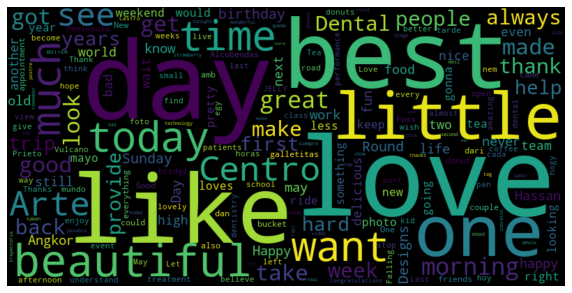

In [99]:
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()